In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
crime=pd.read_csv("/content/drive/MyDrive/Assignment-Data Science/7.Clustering /data/crime_data.csv")

In [5]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<Axes: ylabel='Frequency'>

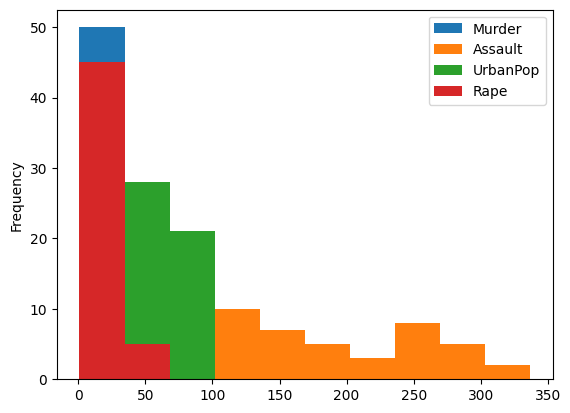

In [8]:
crime.plot.hist()

In [9]:
crime[crime.duplicated()].shape

(0, 5)

In [10]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

# HIERARCHICAL

In [11]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
crime=(crime.iloc[:,1:])
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [13]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime.iloc[:,1:])

In [14]:
crime_norm

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465
5,0.544521,0.779661,0.811370
6,0.222603,0.762712,0.098191
7,0.660959,0.677966,0.219638
8,0.993151,0.813559,0.635659
9,0.568493,0.474576,0.478036


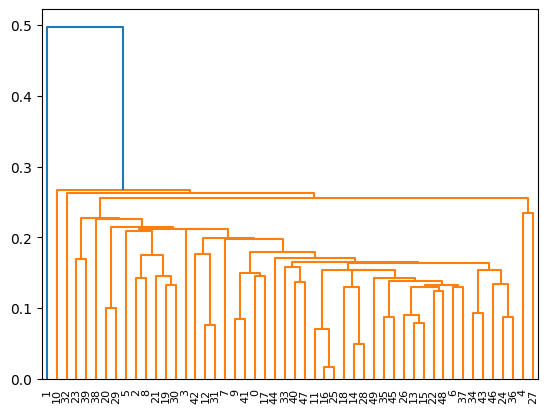

In [15]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

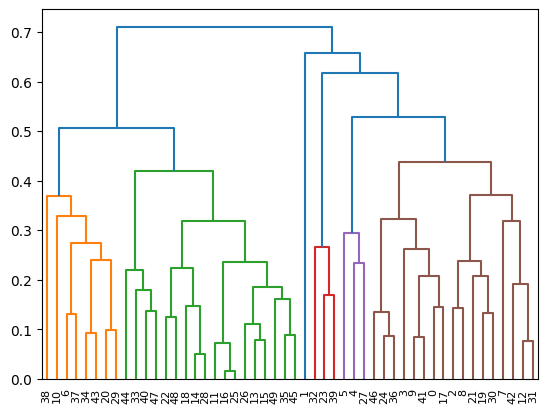

In [16]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='average'))

In [17]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [18]:
clusters=pd.DataFrame(hc.fit_predict(crime_norm),columns=['Clusters'])
clusters['Clusters'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    48
1     1
2     1
Name: Clusters, dtype: int64

In [19]:
# save clusters for chart
y_hc = hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [20]:
Clusters

,Clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [21]:
crime['Clusters']=clusters

In [22]:
crime

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


# K-MEANS

In [23]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

<Axes: xlabel='X', ylabel='Y'>

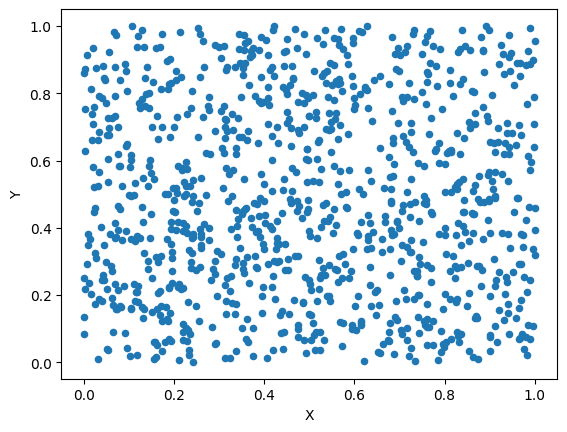

In [24]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [25]:
X = np.random.uniform(0,1,1000)
X

array([9.17797516e-01, 5.07634793e-01, 5.26130983e-01, 3.55252635e-01,
       8.51671872e-01, 7.24239202e-01, 1.53007087e-01, 8.00380019e-01,
       7.69571092e-01, 9.60194976e-01, 9.39212871e-02, 6.37278727e-02,
       1.09169495e-01, 2.17993008e-01, 7.12993381e-01, 6.97452126e-01,
       2.91280227e-01, 8.95326532e-03, 3.42658585e-01, 2.59124756e-01,
       4.06675382e-01, 8.17777140e-01, 1.05482945e-01, 2.49695537e-01,
       3.77539318e-01, 1.16626818e-01, 5.15274568e-01, 5.97772218e-01,
       5.98121472e-01, 4.70318710e-01, 4.89568976e-01, 3.53074166e-01,
       9.05514992e-01, 8.62223182e-01, 7.22754473e-01, 2.55133437e-01,
       4.11535632e-01, 1.61067880e-01, 8.02276869e-01, 7.41225514e-01,
       3.42137061e-01, 2.90221775e-01, 4.58081311e-01, 5.34096339e-01,
       5.70375870e-01, 4.84037570e-01, 6.09783098e-01, 8.36436194e-02,
       4.55683533e-01, 9.93779154e-01, 8.94373340e-01, 7.47796711e-01,
       9.24001701e-01, 7.79964330e-01, 8.45933649e-01, 8.90230947e-01,
      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='X', ylabel='Y'>

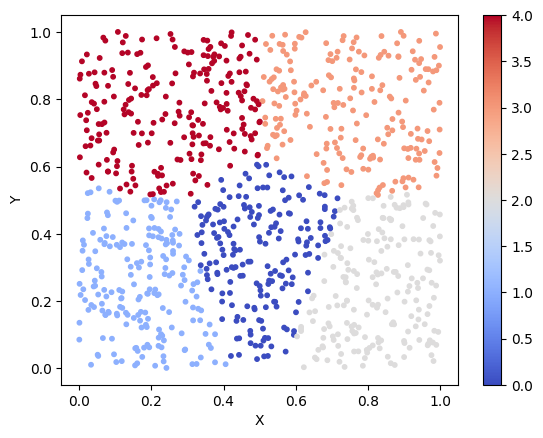

In [26]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [28]:
crime=pd.read_csv("/content/drive/MyDrive/Assignment-Data Science/7.Clustering /data/crime_data.csv")

In [49]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
df_norm = norm_func(crime.iloc[:,1:])


df_norm.head(10)  # Top 10 rows

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465
5,0.544521,0.779661,0.811370
6,0.222603,0.762712,0.098191
7,0.660959,0.677966,0.219638
8,0.993151,0.813559,0.635659
9,0.568493,0.474576,0.478036


In [30]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters
model=KMeans(n_clusters=5)
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 2, 1, 2, 2, 4, 1, 2, 0, 4, 3, 2, 1, 3, 1, 1, 0, 3, 2, 4, 2,
       3, 0, 1, 1, 1, 2, 3, 4, 2, 2, 0, 3, 4, 1, 1, 4, 4, 0, 3, 0, 2, 4,
       3, 1, 4, 3, 3, 1], dtype=int32)

In [50]:
md=pd.Series(model.labels_)
crime['clust']=md
df_norm.head()

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465


In [32]:
crime.iloc[:,1:7].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,14.671429,251.285714,54.285714,21.685714,0.0
1,6.975000,148.416667,62.333333,19.775000,1.0
2,10.966667,264.000000,76.500000,33.608333,2.0
3,2.680000,70.100000,51.000000,10.910000,3.0
4,4.955556,125.444444,80.111111,17.788889,4.0


In [33]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [34]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    Wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

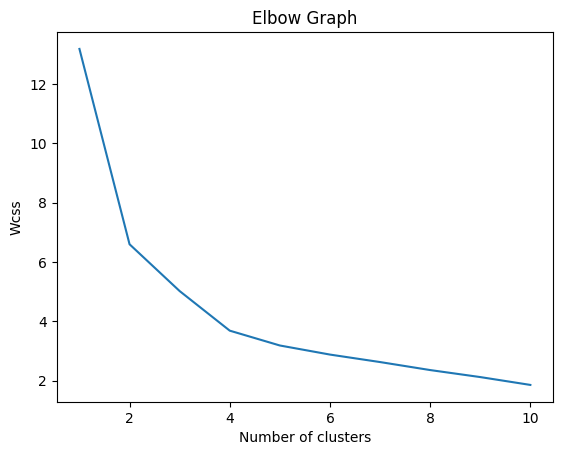

In [35]:
plt.plot(range(1,11),Wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

# DBSCAN

In [37]:
crime=pd.read_csv("/content/drive/MyDrive/Assignment-Data Science/7.Clustering /data/crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [38]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [39]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)

In [40]:
array=crime.values

In [41]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [42]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [43]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [44]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.9)

In [45]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0])

In [46]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [47]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [48]:
pd.concat([crime,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
